This project intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression. 

The source of data is Kaggle. The dataset is publicly available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). 

**Variables**
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

**Demographic:**
- **Sex**: male or female(Nominal)
- **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- **Current Smoker**: whether or not the patient is a current smoker (Nominal)
- **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**
- **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
- **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
- **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
- **Diabetes**: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- **Tot Chol**: total cholesterol level (Continuous)
- **Sys BP**: systolic blood pressure (Continuous)
- **Dia BP**: diastolic blood pressure (Continuous)
- **BMI**: Body Mass Index (Continuous)
- **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of a large number of possible values.)
- **Glucose**: glucose level (Continuous)
Predict variable (desired target)
- **TenYearCHD**: This shows if the person has a risk of getting heart disease in the next ten years. It uses **1** for `yes` and **0** for `no`.
The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. I am going to use the Logistic Regression model for this Supervised Machine Learning project. I am going to use different algorithms like Logistic Regression, Support Vector Machine (SVM), Decision Tree, and Random Forest Regressor. And use Evaluation Metrics to evaluate the result of all algorithms.

Finally, derive the result and deploy the project


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('framingham.csv')
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data = [
    {'Type': 'Numerical', 'Column': 'age'},
    {'Type': 'Numerical', 'Column': 'cigsPerDay'},
    {'Type': 'Numerical', 'Column': 'totChol'},
    {'Type': 'Numerical', 'Column': 'sysBP'},
    {'Type': 'Numerical', 'Column': 'diaBP'},
    {'Type': 'Numerical', 'Column': 'BMI'},
    {'Type': 'Numerical', 'Column': 'heartRate'},
    {'Type': 'Numerical', 'Column': 'glucose'},
    {'Type': 'Categorical', 'Column': 'male'},
    {'Type': 'Categorical', 'Column': 'education'},
    {'Type': 'Categorical', 'Column': 'currentSmoker'},
    {'Type': 'Categorical', 'Column': 'BPMeds'},
    {'Type': 'Categorical', 'Column': 'prevalentStroke'},
    {'Type': 'Categorical', 'Column': 'prevalentHyp'},
    {'Type': 'Categorical', 'Column': 'diabetes'}
]
pd.DataFrame(data)

,Type,Column
0,Numerical,age
1,Numerical,cigsPerDay
2,Numerical,totChol
3,Numerical,sysBP
4,Numerical,diaBP
5,Numerical,BMI
6,Numerical,heartRate
7,Numerical,glucose
8,Categorical,male
9,Categorical,education


In [4]:
dataset.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


#### Correlation between variables.

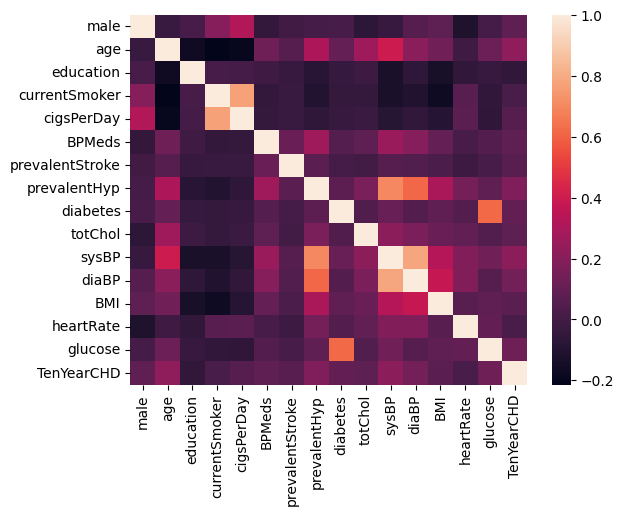

In [6]:
sns.heatmap(dataset.corr());

In a correlation matrix heatmap, colors are used to represent the strength and direction of the relationship between features.

The intensity of the color reflects the strength of the correlation. Darker shades signify a stronger correlation, while lighter shades indicate a weaker correlation. The diagonal of the heatmap is often a solid color (typically white) as it represents the correlation of a feature with itself, which is always perfect and not informative for analysis.

<br>

**Seeing what percentage of patient suffer from Coronary Heart Disease in the Ten Year Period.**

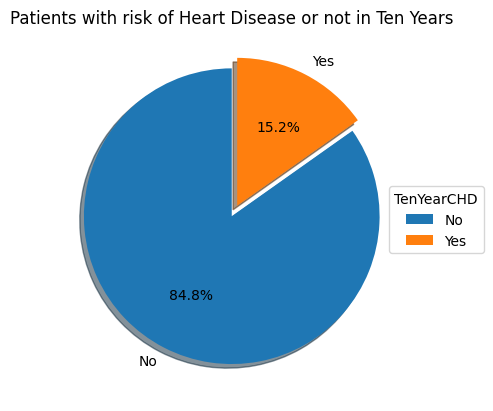

In [7]:
explode = (0, 0.08)
counts = dataset['TenYearCHD'].value_counts()
counts.plot.pie(title="Patients with risk of Heart Disease or not in Ten Years", legend=False, startangle=90,
                 explode=explode, shadow=True, autopct='%1.1f%%', labels=['No', 'Yes'])
plt.legend(title='TenYearCHD', loc='upper right', bbox_to_anchor=(1.2, 0.6))
plt.ylabel(' ')
plt.show()

<br>

**I am analyzing individuals who smoke more than or equal to 10 cigarettes per day and have cholesterol levels above 240 mg/dL (considered high) and below 150 mg/dL (considered low). Additionally, I am investigating how many of these patients have chance to suffer from coronary heart disease. This analysis aims to understand the relationship between smoking, cholesterol levels, and coronary heart disease risk..**

In [8]:
filtered_data = dataset[((dataset.totChol > 240) | (dataset.totChol < 150)) & (dataset.cigsPerDay >= 10)]

num_with_heart_disease = len(filtered_data[filtered_data['TenYearCHD'] == 1])

num_without_heart_disease = len(filtered_data[filtered_data['TenYearCHD'] == 0])

print(f"Number of individuals with high or low cholesterol levels and smoking more than 10 cigarettes per day:")
print(f"- With heart disease: {num_with_heart_disease}")
print(f"- Without heart disease: {num_without_heart_disease}")

Number of individuals with high or low cholesterol levels and smoking more than 10 cigarettes per day:
- With heart disease: 139
- Without heart disease: 501


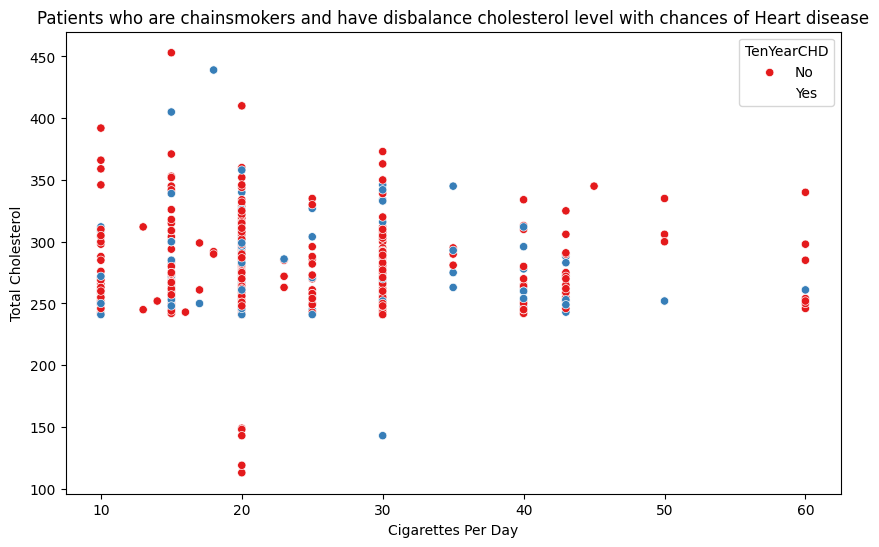

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='cigsPerDay', y='totChol', hue='TenYearCHD', style='currentSmoker', palette='Set1')
plt.title('Patients who are chainsmokers and have disbalance cholesterol level with chances of Heart disease')
plt.xlabel('Cigarettes Per Day')
plt.ylabel('Total Cholesterol')
plt.legend(title='TenYearCHD', loc='upper right', labels=['No', 'Yes'])
plt.show()

In this scatter plot:
- The x-axis represents the number of cigarattes per day (`cigsPerDay`)
- The y-axis represents the total cholesterol level (`totChol`).
- The points are colored based on the presence of TenYearCHD (`hue='TenYearCHD'`), with 'No' indicating no CHD and 'Yes' indicating CHD.
- The points are styled based on the current smoking status (`style='currentSmoker'`), which differentiates between current smokers and non-smokers.
-  The red color represents individuals who suffer from coronary heart disease. This is because I filtered the data to include only those with `TenYearCHD == 1`, which indicates that these individuals are at risk of or have coronary heart disease within ten years. 

<br>

**Identify individuals with normal cholesterol levels (150-240 mg/dL) who smoke fewer than 10 cigarettes per day or do not smoke, and determine if they will have heart disease.**

In [10]:
normal_chol_smoking_data = dataset[((dataset.totChol <= 240) & (dataset.totChol >= 150)) & ((dataset.cigsPerDay < 10) | (dataset.cigsPerDay.isna()))]

num_suffering_from_chd = len(normal_chol_smoking_data[normal_chol_smoking_data['TenYearCHD'] == 1])

num_not_suffering_from_chd = len(normal_chol_smoking_data[normal_chol_smoking_data['TenYearCHD'] == 0])

print(f"Number of individuals with normal cholesterol levels and smoking less than 10 cigarettes per day or not smoking:")
print(f"- Suffering from CHD: {num_suffering_from_chd}")
print(f"- Not suffering from CHD: {num_not_suffering_from_chd}")

Number of individuals with normal cholesterol levels and smoking less than 10 cigarettes per day or not smoking:
- Suffering from CHD: 171
- Not suffering from CHD: 1281


<br>

**Identifying individuals without high or low cholesterol levels who smoke more than 10 cigarettes per day and those with normal cholesterol levels who smoke less than 10 cigarettes per day or do not smoke, but who suffer from heart disease.**

In [11]:
not_in_either_category_data = dataset[~dataset.index.isin(filtered_data.index) & ~dataset.index.isin(normal_chol_smoking_data.index)]

num_not_in_either_category = len(not_in_either_category_data)

print(f"Number of individuals who do not fall into either category: {num_not_in_either_category}")

num_not_in_either_category_with_heart_disease = len(not_in_either_category_data[not_in_either_category_data['TenYearCHD'] == 1])

num_not_in_either_category_without_heart_disease = len(not_in_either_category_data[not_in_either_category_data['TenYearCHD'] == 0])

print(f"Number of individuals who do not fall into either category:")
print(f"- With heart disease: {num_not_in_either_category_with_heart_disease}")
print(f"- Without heart disease: {num_not_in_either_category_without_heart_disease}")

Number of individuals who do not fall into either category: 2146
Number of individuals who do not fall into either category:
- With heart disease: 334
- Without heart disease: 1812


<br>

In [13]:
count=0
for i in dataset.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(dataset.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  582
since it is only 14 percent of the entire dataset the rows with missing values are excluded.


<br>

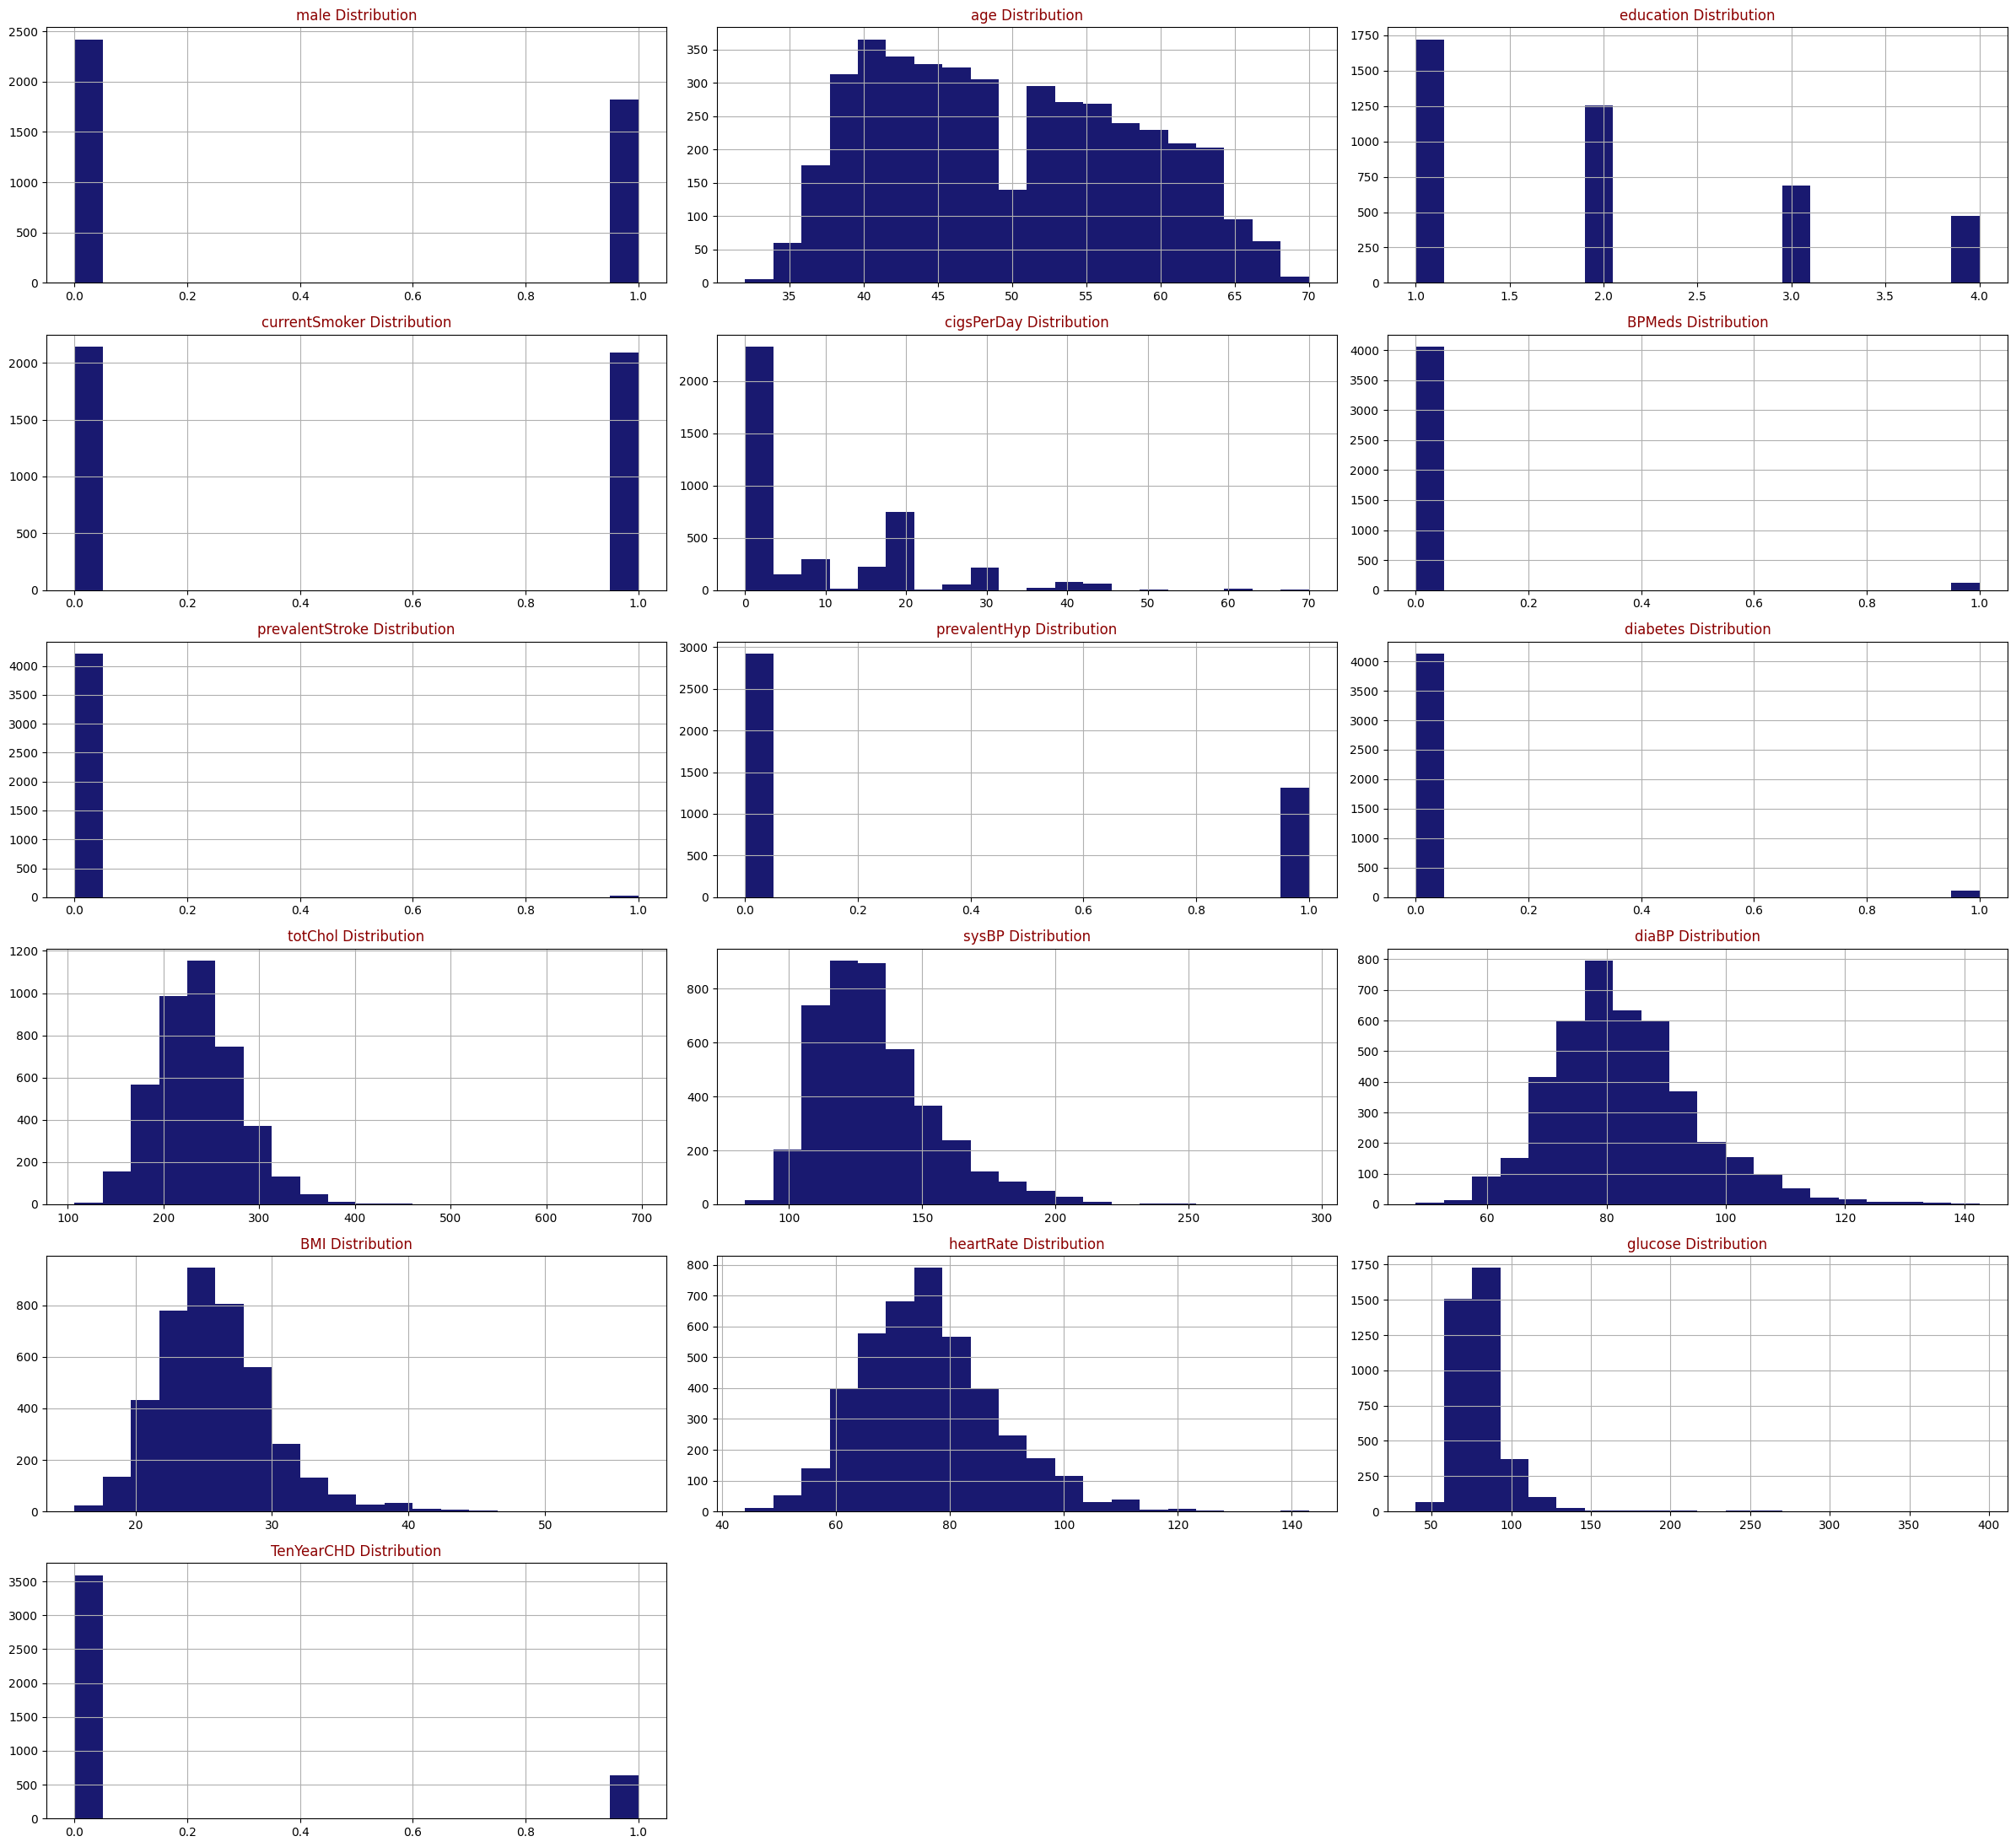

In [16]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(24,22))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(dataset,dataset.columns,6, 3)

The above figure shows how the data are distributed.